# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from scipy.special import factorial
import statsmodels.api as sm
from scipy.stats import t as t_student
from scipy.stats import f
from scipy.stats import normaltest
from scipy.stats import probplot
import matplotlib.pyplot as plt

### Importe o dataset

In [2]:
dataset = pd.read_csv("dados_projeto.csv", sep=";")

### Visualize o conteúdo do DataFrame

In [5]:
dataset.head()

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


In [8]:
dataset.shape

(365, 2)

### Obtenha e avalie as estatísticas descritivas dos dados

In [6]:
dataset.describe()

,Y,X
count,365.000000,365.000000
mean,25401.367123,21.226356
std,4399.142703,3.180108
min,14343.000000,12.900000
25%,22008.000000,19.020000
50%,24867.000000,21.380000
75%,28631.000000,23.280000
max,37937.000000,28.860000


### Análise gráfica
### Construa um box plot para cada variável do dataset

<Axes: title={'center': 'Box plot Temperatura média'}, xlabel='°C (média)'>

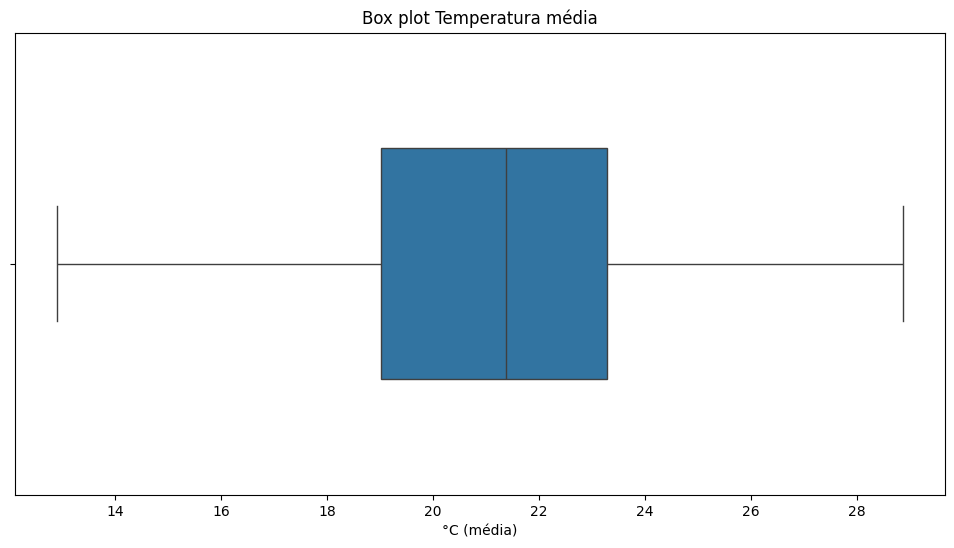

In [9]:
ax = sn.boxplot(data=dataset.X, orient='h', width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title("Box plot Temperatura média")
ax.set_xlabel("°C (média)")
ax

<Axes: title={'center': 'Box plot Consumo médio de cerveja'}, xlabel='Litros consumidos'>

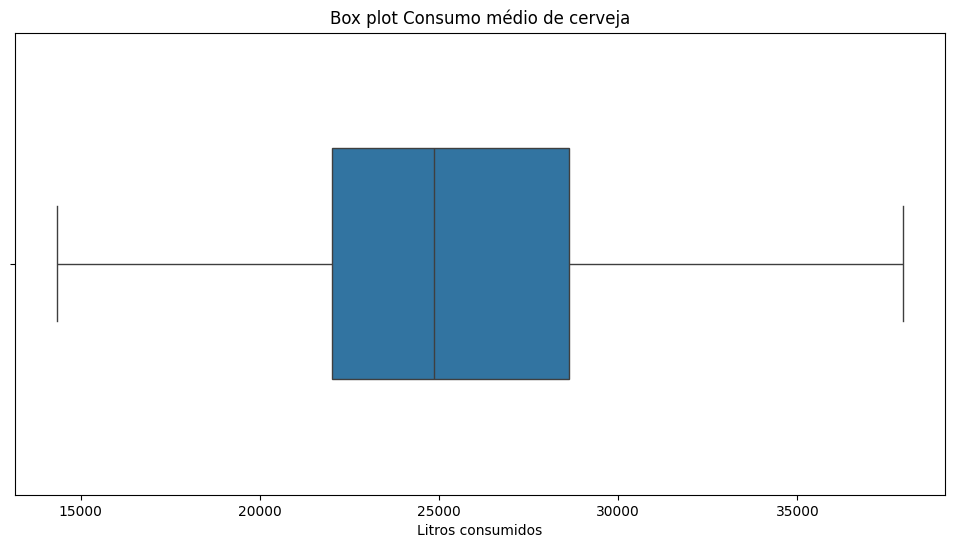

In [10]:
ax = sn.boxplot(data=dataset.Y, orient='h', width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title("Box plot Consumo médio de cerveja")
ax.set_xlabel("Litros consumidos")
ax

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

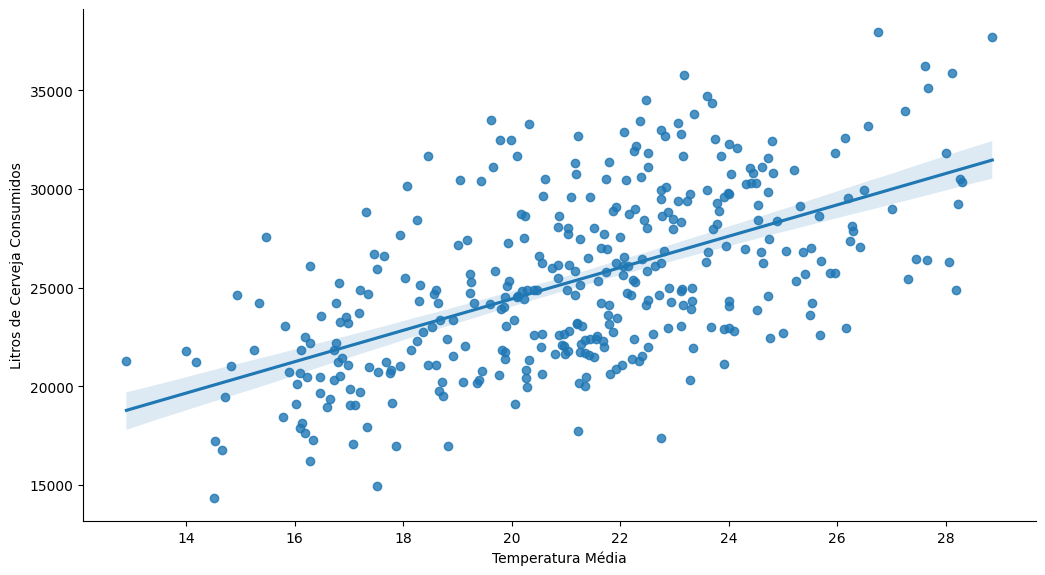

In [4]:
ax = sn.lmplot(x="X",y="Y", data=dataset)
ax.figure.set_size_inches(12,6)
ax.set_titles("Reta de Regressão - Temperatura Média X Litros de Cerveja Consumidos")
ax.set_xlabels("Temperatura Média")
ax.set_ylabels("Litros de Cerveja Consumidos")

### <font color='red'>Utilizando a matriz de correlação</font>

In [3]:
dataset.cov()

,Y,X
Y,1.935246e+07,8038.714473
X,8.038714e+03,10.113085


In [5]:
dataset.corr()

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: Sim, porém não muito forte. A nuvem de distribuição de pontos comparada à reta de regressão está muito dispersa. Ela segue levemente a linha de regressão mas, muitos valores de uma extremidade são maiores ou menores que os da outra, indicando que a temperatura não aparenta ter grande influencia no consumo de cerveja entre a população estudada.

É possível quantificar a intensidade dessa relação?

Resp.: Sim, pela matriz de correlação temos uma valor de 0 a 1 para dar uma noção do quão forte é a relação entre as variáveis. No nosso caso, 0.574, ela não é muito forte.

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.: Não, as medidas de covariância não representam causalidade entre variáveis. É necessário um estudo de relação mais específico para o cenário para ditar se há causalidade envolvida.

### Prepare os dados para estimar um modelo de regressão linear simples

In [6]:
Y = dataset.Y
X = sm.add_constant(dataset.X)
X.head()


,const,X
0,1.0,27.30
1,1.0,27.02
2,1.0,24.82
3,1.0,23.98
4,1.0,23.82


### Estime o modelo de regressão linear simples

In [7]:
reg = sm.OLS(Y, X, missing='drop').fit()

### Visualize o resultado da regressão

In [8]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           1.87e-33
Time:                        06:39:56   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

### Obtenha o $Y$ previsto

In [10]:
dataset['Y_previsto'] = reg.predict()
dataset.head()

,Y,X,Y_previsto
0,25461,27.30,30229.200544
1,28972,27.02,30006.633434
2,30814,24.82,28257.891852
3,29799,23.98,27590.190521
4,28900,23.82,27463.009315


In [9]:
def get_predicted_y(x):
    return reg.predict([1, x])

### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [13]:
get_predicted_y(42)[0]

41913.97383816628

### Obtenha os resíduos da regressão

In [15]:
dataset['u'] = reg.resid
dataset.head()

,Y,X,Y_previsto,u
0,25461,27.30,30229.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148
3,29799,23.98,27590.190521,2208.809479
4,28900,23.82,27463.009315,1436.990685


### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

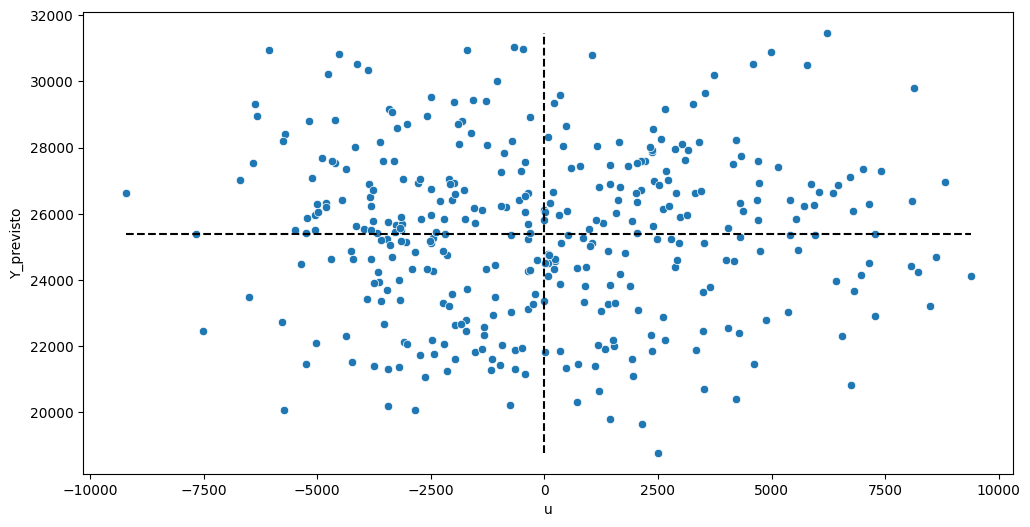

In [26]:
x = dataset.u
y = dataset.Y_previsto

ax = sn.scatterplot(x = x, y = y)
ax.figure.set_size_inches(12,6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

### Obtenha o QQPlot dos resíduos

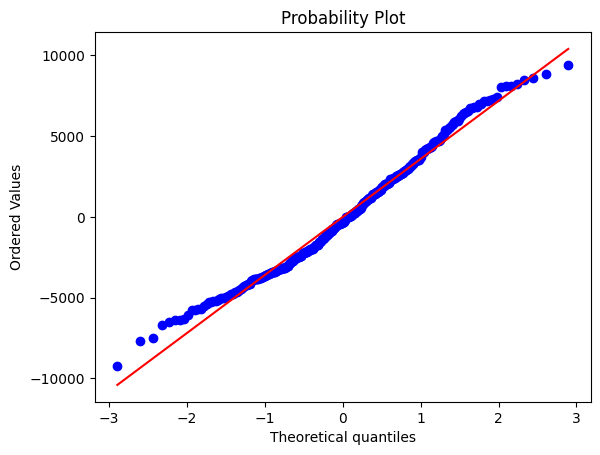

In [18]:
(_, (_, _, _)) = probplot(dataset.u, plot = plt)

### <font color='red'>A partir dos outputs acima, qual conclusão podemos tirar sobre o comportamento dos resíduos?</font>

Tanto o gráfico de dispersão dos resíduos em relação ao Y Previsto e o QQPlot indicam uma distribuição não fortemente normal dos resíduos.
Além disso, no sumário da regressão:
- Omnibus(Prob) possui valor menor que a significância
- Skew possui valor maior que zero
- Kurtosis possui valor maior que zero
- Prob(JB) é também menor que a significância

Todas estas estatísticas negam a distribuição normal dos resíduos da regressão.


### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

In [20]:
SQE = dataset.u.apply(lambda u: u ** 2).sum() # ou reg.ssr
SQE

4718394688.067692

In [21]:
SQT = dataset.Y.apply(lambda y: (y - dataset.Y.mean()) ** 2).sum()
SQT

7044294174.805479

In [22]:
SQR = dataset.Y_previsto.apply(lambda yi: (yi - dataset.Y.mean()) ** 2).sum() # ou reg.ess
SQR

2325899486.7377872

In [23]:
R2 = SQR / SQT # ou reg.rsquared
R2

0.33018204933243217

Quanto mais próximo de 1 o R², melhor é o ajuste da reta regressão. Neste caso, vemos que a regressão não se ajusta muito bem aos dados.

Deve-se notar também os gráficos visualizados anteriormente. Vemos neles uma distribuição relativamente dispersa entre temperatura e consumo, o que indica uma linearidade não muito forte entre as variáveis.